<a href="https://colab.research.google.com/github/AlbionKransiqi/Capstone/blob/main/%5BUpdate_Nov_2%5D_D2S_data_pre_processing_%26_MASK_RCNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install h5py==2.10.0 --quiet
!pip install q keras==2.1.6 --quiet
!pip install tensorflow==1.14 --quiet

     |████████████████████████████████| 2.9 MB 5.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires h5py~=3.1.0, but you have h5py 2.10.0 which is incompatible.
     |████████████████████████████████| 339 kB 5.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires h5py~=3.1.0, but you have h5py 2.10.0 which is incompatible.
tensorflow 2.6.0 requires keras~=2.6, but you have keras 2.1.6 which is incompatible.
     |████████████████████████████████| 109.3 MB 47 kB/s 
     |████████████████████████████████| 3.1 MB 34.4 MB/s 
     |████████████████████████████████| 50 kB 5.8 MB/s 
     |████████████████████████████████| 488 kB 35.9 MB/s 
ERROR: pip's dependency resolver does not curr

In [3]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [4]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
from glob import glob
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

import urllib.request
import shutil
import pandas as pd
import keras
from google.colab import drive
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [5]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
os.chdir("/content/gdrive/MyDrive/Colab Notebooks")

In [7]:
print(os.getcwd())

/content/gdrive/MyDrive/Colab Notebooks


In [8]:
#!git clone https://github.com/matterport/Mask_RCNN.git

In [9]:
ROOT_DIR = 'gdrive/My Drive/Colab Notebooks/Mask_RCNN'

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library

from mrcnn.config import Config
from mrcnn import model as modellib, utils
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import MaskRCNN

In [10]:
os.chdir("/content/gdrive/MyDrive/Colab Notebooks")

In [11]:
## !git clone https://github.com/waleedka/coco.git

In [12]:
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))

# Download and install the Python COCO tools from https://github.com/waleedka/coco
import coco
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from pycocotools import mask as maskUtils
from pycocotools import mask

In [14]:
# Directory of images to run detection on
D2S_DATSET_DIR = '/content/gdrive/My Drive/Colab Notebooks/supermarket_data'

annotations= os.path.join(D2S_DATSET_DIR, 'd2s_annotations_v1/D2S_validation.json')
coco=COCO(annotations)
class_ids = sorted(coco.getCatIds())

print("Classes:")
cat_names = []
for i in class_ids:
  print(i,'-', coco.loadCats(i)[0]["name"])
  cat_names.append(coco.loadCats(i)[0]["name"])

loading annotations into memory...
Done (t=1.64s)
creating index...
index created!
Classes:
1 - adelholzener_alpenquelle_classic_075
2 - adelholzener_alpenquelle_naturell_075
3 - adelholzener_classic_bio_apfelschorle_02
4 - adelholzener_classic_naturell_02
5 - adelholzener_gourmet_mineralwasser_02
6 - augustiner_lagerbraeu_hell_05
7 - augustiner_weissbier_05
8 - coca_cola_05
9 - coca_cola_light_05
10 - suntory_gokuri_limonade
11 - tegernseer_hell_03
12 - corny_nussvoll
13 - corny_nussvoll_single
14 - corny_schoko_banane
15 - corny_schoko_banane_single
16 - dr_oetker_vitalis_knuspermuesli_klassisch
17 - koelln_muesli_fruechte
18 - koelln_muesli_schoko
19 - caona_kakaohaltiges_getraenkepulver
20 - cocoba_fruehstueckskakao_mit_honig
21 - cafe_wunderbar_espresso
22 - douwe_egberts_professional_kaffee_gemahlen
23 - gepa_bio_caffe_crema
24 - gepa_italienischer_bio_espresso
25 - apple_braeburn_bundle
26 - apple_golden_delicious
27 - apple_granny_smith
28 - apple_roter_boskoop
29 - avocado
30 

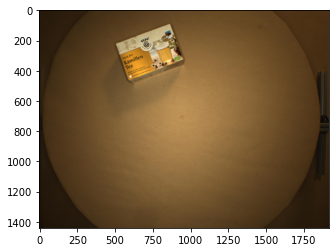

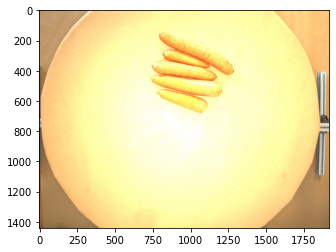

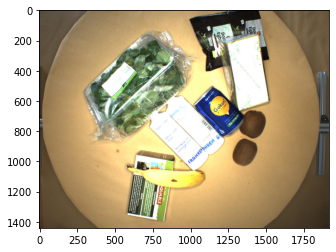

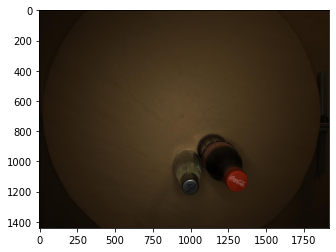

In [ ]:
images = sorted(glob("/content/gdrive/My Drive/Colab Notebooks/supermarket_data/images/*"))

for i in range(1,12005,4000):
    image = Image.open(images[i])
    imgplot = plt.imshow(image)
    plt.show()

**Loading the data**

In [15]:
# Root directory of the project
sys.path.append(os.path.join(ROOT_DIR, "mrcnn/")) 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

In [16]:
annotations= os.path.join(D2S_DATSET_DIR, 'd2s_annotations_v1/D2S_validation.json')
coco=COCO(annotations)

classes = coco.loadCats(coco.getCatIds())
catIds=[cat['id'] for cat in classes]

imgids=[]
for i, value in enumerate(catIds):
    imgid=coco.getImgIds(catIds=catIds[i])
    imgids.extend(imgid)

imgids = list(set(imgids))

imgDict = coco.loadImgs(imgids)
img1 = pd.DataFrame.from_dict(imgDict)
data_list1=img1.filter(['file_name','id'])

loading annotations into memory...
Done (t=0.29s)
creating index...
index created!


In [17]:
X_train,X_val1 = train_test_split(data_list1,test_size=0.2, random_state=42,
                                 shuffle=True)
X_val,X_test = train_test_split(X_val1,test_size=0.5, random_state=42,
                                 shuffle=True)
img_id_train=X_train['id']
img_id_dev=X_val['id']
img_id_test = X_test['id']
X_train=X_train['file_name']
X_val=X_val['file_name']
X_test = X_test['file_name']
X_train.reset_index(drop=True,inplace=True)
X_val.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

In [18]:
## this was adapted from COCO dataset sample
class D2S_Dataset(utils.Dataset):
    def load_d2s(self,subset):
        
        #annotation path
        annFile= annotations
        coco=COCO(annotations)  
        
        dataset_dir= D2S_DATSET_DIR
        assert subset in ["train", "val"]
            
        image_dir = os.path.join(D2S_DATSET_DIR, 'images')
        
        if subset == "train" : 
            image_ids=img_id_train
        else:
            image_ids=img_id_dev
            
        # Add classes
        class_ids = sorted(coco.getCatIds())
        for i in class_ids:
            self.add_class("coco", i, coco.loadCats(i)[0]["name"])

        # Add images
        for i in image_ids:
            self.add_image(
                "coco", image_id=i,
                path=os.path.join(image_dir, coco.imgs[i]['file_name']),
                width=coco.imgs[i]["width"],
                height=coco.imgs[i]["height"],
                annotations=coco.loadAnns(coco.getAnnIds(imgIds=[i], iscrowd=False)))
        

    def load_mask(self, image_id):
        """Load instance masks for the given image.
        """
        # If not a COCO image, delegate to parent class.
        image_info = self.image_info[image_id]
        if image_info["source"] != "coco":
            return super(self.__class__).load_mask(image_id)

        instance_masks = []
        class_ids = []
        annotations = self.image_info[image_id]["annotations"]
        
        # Build mask of shape [height, width, instance_count] 
        for annotation in annotations:
            class_id = self.map_source_class_id(
                "coco.{}".format(annotation['category_id']))
            if class_id:
                m = self.annToMask(annotation, image_info["height"],
                                   image_info["width"])
                if m.max() < 1:
                    continue
                instance_masks.append(m)
                class_ids.append(class_id)

        # Pack instance masks into an array
        if class_ids:
            mask = np.stack(instance_masks, axis=2)
            class_ids = np.array(class_ids, dtype=np.int32)
            return mask, class_ids
        else:
            # Call super class to return an empty mask
            return super(self.__class__).load_mask(image_id)

    def image_reference(self, image_id):
        """Return a link to the image in the COCO Website."""
        info = self.image_info[image_id]
        if info["source"] == "coco":
            return "http://cocodataset.org/#explore?id={}".format(info["id"])
        else:
            super(self.__class__).image_reference(self, image_id)

    def annToRLE(self, ann, height, width):
        """
        Convert annotation which can be polygons, uncompressed RLE to RLE.
        :return: binary mask (numpy 2D array)
        """
        segm = ann['segmentation']
        if isinstance(segm, list):
            # polygon -- a single object might consist of multiple parts
            # we merge all parts into one mask rle code
            rles = maskUtils.frPyObjects(segm, height, width)
            rle = maskUtils.merge(rles)
        elif isinstance(segm['counts'], list):
            # uncompressed RLE
            rle = maskUtils.frPyObjects(segm, height, width)
        else:
            # rle
            rle = ann['segmentation']
        return rle

    def annToMask(self, ann, height, width):
        """
        Convert annotation which can be polygons, uncompressed RLE, or RLE to binary mask.
        :return: binary mask (numpy 2D array)
        """
        rle = self.annToRLE(ann, height, width)
        m = maskUtils.decode(rle)
        return m

In [19]:
def coco_results(dataset, image_ids, res, class_ids, scores, masks):

    # If no results, return an empty list
    if res is None:
        return []

    results = []
    for image_id in image_ids:
        # Loop through detections
        for i in range(res.shape[0]):
            class_id = class_ids[i]
            score = scores[i]
            bbox = np.around(res[i], 1)
            mask = masks[:, :, i]

            result = {
                "image_id": image_id,
                "category_id": dataset.get_source_class_id(class_id, "coco"),
                "bbox": [bbox[1], bbox[0], bbox[3]-bbox[1], bbox[2]-bbox[0]],
                "score": score,
                "segmentation": maskUtils.encode(np.asfortranarray(mask))
            }
            results.append(result)
    return results

In [20]:
## dividing the data in two categories
dataset_train = D2S_Dataset()
dataset_train.load_d2s(subset="train")
dataset_train.prepare()

dataset_val = D2S_Dataset()
dataset_val.load_d2s(subset="val")
dataset_val.prepare()

loading annotations into memory...
Done (t=0.32s)
creating index...
index created!
loading annotations into memory...
Done (t=0.18s)
creating index...
index created!


In [24]:
class D2S_Config(Config):
    # Give the configuration a recognizable name
    NAME = "D2S"
    
    ## the values of the vars below would depend on the GPU 
    LEARNING_RATE =0.002
    STEPS_PER_EPOCH= 250    
    GPU_COUNT =  1
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 60 
        
    BACKBONE = "resnet50"
    IMAGE_MIN_DIM = 128
    IMAGE_MAX_DIM = 128

class Set_Config(D2S_Config):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

configurations = Set_Config()

In [25]:
config = D2S_Config()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  128
IMAGE_META_SIZE                73
IMAGE_MIN_DIM                  128
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [128 128   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.002
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

In [52]:
COCO_MODEL_PATH = '/content/gdrive/MyDrive/Colab Notebooks/Mask_RCNN/mask_rcnn_coco.h5'

model = modellib.MaskRCNN(mode="training", config=config,model_dir=MODEL_DIR)

model.load_weights(COCO_MODEL_PATH, by_name=True,exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])

model.train(dataset_train, dataset_val,
                learning_rate=config.LEARNING_RATE,
                epochs=50,
                layers='all')

In [53]:
# Show stats of all trainable weights    
visualize.display_weight_stats(model)

WEIGHT NAME,SHAPE,MIN,MAX,STD
conv1_2/kernel:0,"(7, 7, 3, 64)",-0.8616,+0.8454,+0.1315
conv1_2/bias:0,"(64,)",-0.0002,+0.0004,+0.0001
bn_conv1_2/gamma:0,"(64,)",+0.0835,+2.6411,+0.5091
bn_conv1_2/beta:0,"(64,)",-2.3931,+5.3610,+1.9781
bn_conv1_2/moving_mean:0,"(64,)",-173.0470,+116.3013,+44.5654
bn_conv1_2/moving_variance:0*** Overflow?,"(64,)",+0.0000,+146335.3594,+21847.9668
res2a_branch2a_2/kernel:0,"(1, 1, 64, 64)",-0.6574,+0.3180,+0.0764
res2a_branch2a_2/bias:0,"(64,)",-0.0022,+0.0082,+0.0018
bn2a_branch2a_2/gamma:0,"(64,)",+0.2169,+1.8489,+0.4116
bn2a_branch2a_2/beta:0,"(64,)",-2.1180,+3.7333,+1.1786


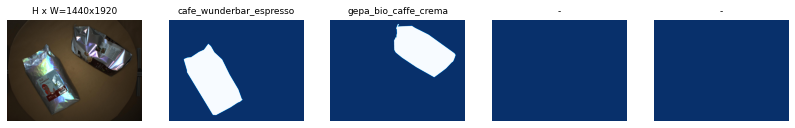

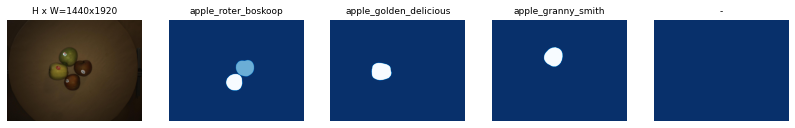

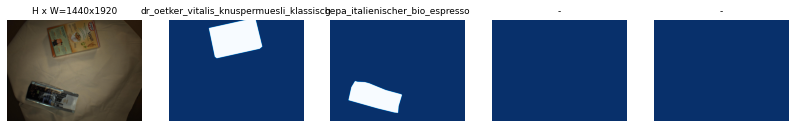

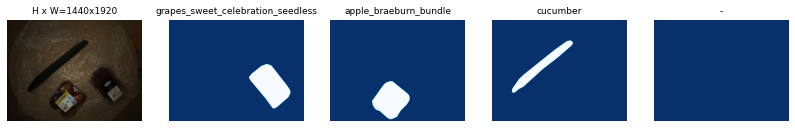

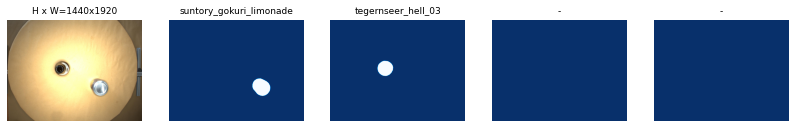

In [44]:
# Load and display random samples
image_ids = np.random.choice(dataset_val.image_ids, 5)

for image_id in image_ids:
    image = dataset_val.load_image(image_id)
    mask, class_ids = dataset_val.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_val.class_names)

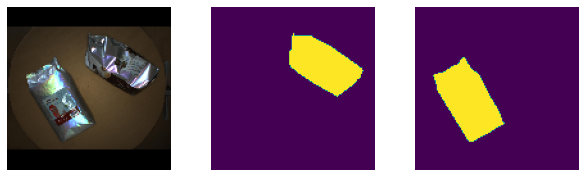

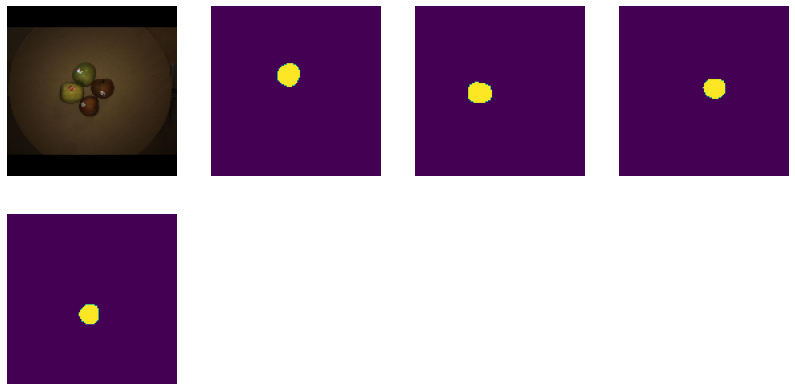

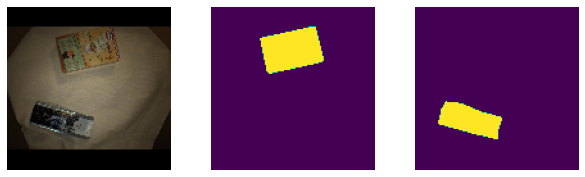

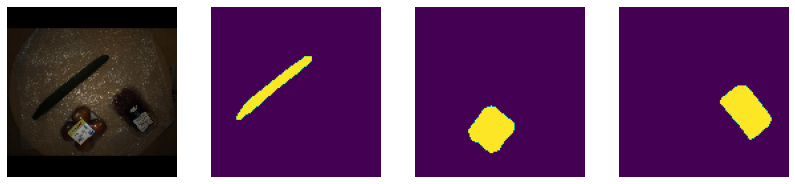

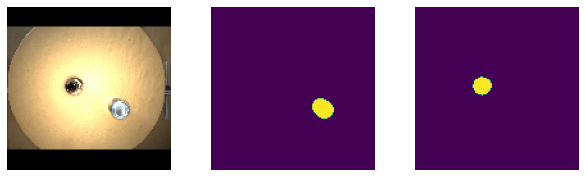

In [50]:
from mrcnn.visualize import display_images

for image_id in image_ids:
  image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
      dataset_val, config, image_id, use_mini_mask=False)
  display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

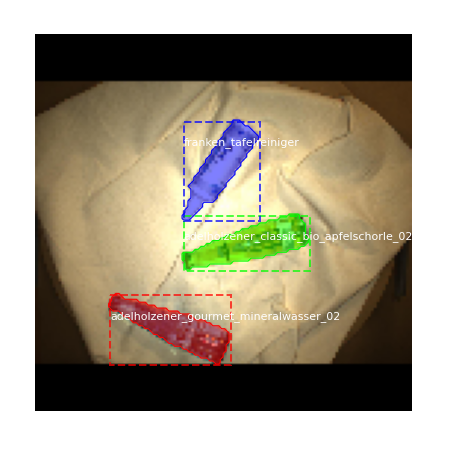

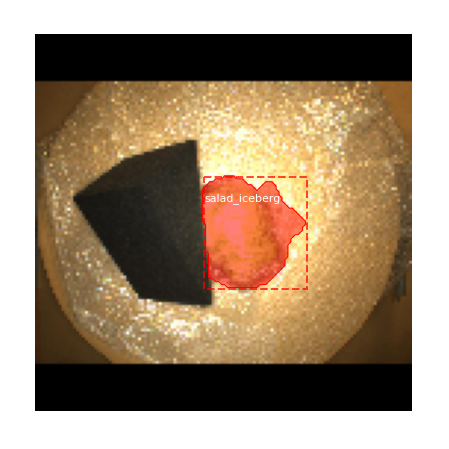

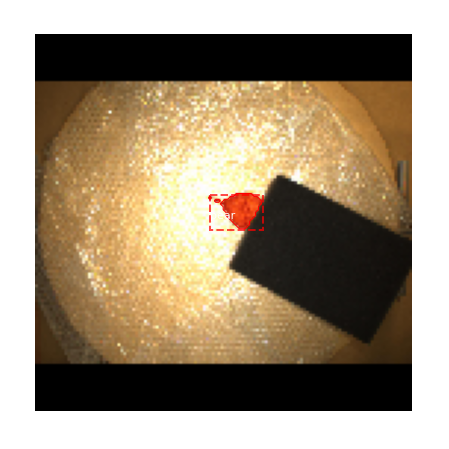

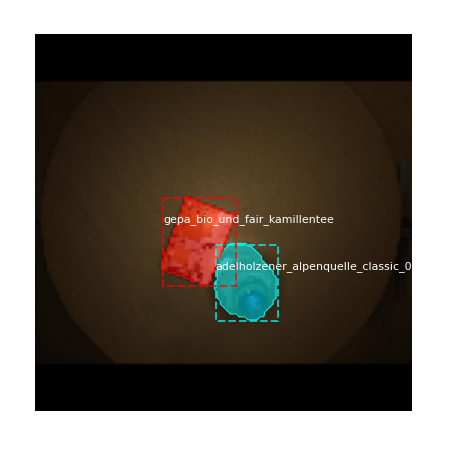

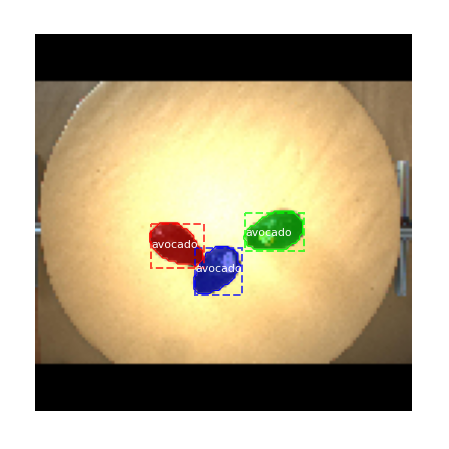

In [55]:
for i in range(5,50,11):
  org_image, image_meta, get_class_id, get_box, get_mask =\
      modellib.load_image_gt(dataset_val, configurations, 
                            image_id=i, use_mini_mask=False)
    
    
  visualize.display_instances(org_image, get_box, get_mask, get_class_id, 
                              dataset_val.class_names, figsize=(8, 8))

In [95]:
with tf.device('/CPU:0'):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

APs = []
precisions_lst = []

def compute_batch_metrics(image_ids):
    for image_id in image_ids:

        # Load image
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(dataset_val, configurations,
                                   image_id, use_mini_mask=False)
        # Run object detection
        results = model.detect([image], verbose=0)
        
        # Compute AP
        result = results[0]
        AP, precisions, recalls, overlaps =\
            utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                              result['rois'], result['class_ids'], result['scores'], result['masks'])
        
        APs.append(AP)
        precisions_lst.append(np.mean(precisions))
    return APs, precisions_lst

In [100]:
# Pick a set of random images
image_ids = np.random.choice(dataset_val.image_ids, 20)

APs, precisions_lst = compute_batch_metrics(image_ids)
print("mAP @ IoU=50: ", np.mean(APs))
print("Average Precision: ", np.mean(precisions_lst))

mAP @ IoU=50:  67.54
Average Precision:  65.38
